## Activation Functions

- Add non-linearity to the network (to model for complex relationships)
- sigmoid for binary classification (n_classes = 2)
- softmax for multi-class classification (n_classes = 3 or more)


todo: master list of activation functions for real world data science applications

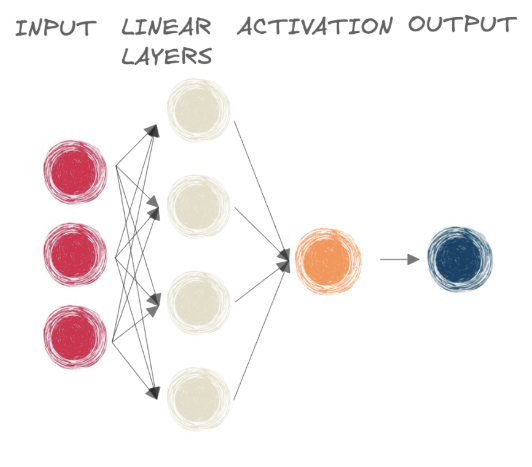

Pre-activation output passed to activation function



## Binary Classification

e.g. of Binary Classification
output of linear layers = 6    
6 is passed to activation function, output of activation function = p    
if p > 0.5, "class_a" is the outcome, else "class_b" is the outcome    


todo: sigmoid formula mention here

In [42]:
import torch
import torch.nn as nn

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


sigmoid = nn.Sigmoid()

print(sigmoid)
print(type(sigmoid))

Sigmoid()
<class 'torch.nn.modules.activation.Sigmoid'>


In [9]:
input_tensor = torch.tensor([[6]])

output = sigmoid(input_tensor) # deterministic
print(output)

tensor([[0.9975]])


In [11]:
my_model = nn.Sequential(
    nn.Linear(6, 4),  # Linear Layer 1 
    nn.Linear(4, 1),  # Linear Layer 2
    nn.Sigmoid()      # Activation layer
    )

## Multi-class Classification

In [15]:
import torch
import torch.nn as nn

# apply softmax along the last dimension of input tensor
softmax = nn.Softmax(dim = -1)
# todo: what params are there for softmax?

print(softmax)
print(type(softmax))

Softmax(dim=-1)
<class 'torch.nn.modules.activation.Softmax'>


In [16]:
input_tensor = torch.tensor([[4.3, 6.1, 2.3]])

output_tensor = softmax(input_tensor)   # probabilities, deterministic
print(output_tensor)

tensor([[0.1392, 0.8420, 0.0188]])


## Prediction
AKA Running a forward pass through the network
To Produce predictions based on learned params (weights and biases)

Final Output: Binary, Multi-class, Numerics (Regression)


todo: how do we know how many layers and neurons in each layer?


In [18]:
# 5 observations, 6 features
input_data = torch.tensor([
    [-0.4421, 1.5207, 2.0607, -0.3647, 0.4691, 0.0946],
    [-0.9155, -0.0475, -1.3645, 0.6336, -1.9520, -0.3398],
    [ 0.7406, 1.6763, -0.8511, 0.2432, 0.1123, -0.0633],
    [-1.6630, -0.0718, -0.1285, 0.5396, -0.0288, -0.8622],
    [-0.7413, 1.7920, -0.0883, -0.6685, 0.4745, -0.4245]
])

In [20]:
# Binary Classification
my_model = nn.Sequential(
    nn.Linear(6,4), # 6 features as inputs. 4 neurons in the layer, why? todo 
    nn.Linear(4,1), # 4 inputs. 1 output, why? todo
    nn.Sigmoid()
)
my_model(input_data)

tensor([[0.5553],
        [0.7125],
        [0.5931],
        [0.6048],
        [0.5290]], grad_fn=<SigmoidBackward0>)

In [27]:
# import numpy as np
# np.where(my_model(input_data) > 0.5, 1, 0) # numpy operations allowed

In [31]:
# Multi-class Classification (3 possible prediction classes)
my_model = nn.Sequential(
    nn.Linear(6, 4), 
    nn.Linear(4, 3), # 3 classes 
    nn.Softmax(dim=-1)
)
my_model(input_data)

# todo: how to interpret this
# interpretation: probabiblity of an observation belonging to classA, classB, classC
# Each observation's probability add up to 1

tensor([[0.3266, 0.4125, 0.2609],
        [0.3076, 0.2454, 0.4471],
        [0.3000, 0.1858, 0.5142],
        [0.3310, 0.3849, 0.2840],
        [0.3039, 0.2375, 0.4586]], grad_fn=<SoftmaxBackward0>)

In [35]:
# Regression
my_model = nn.Sequential(
    nn.Linear(6, 4), 
    nn.Linear(4, 1), # 1 output 
    # nn.Softmax(dim=-1) # no activation function in the end. todo: why not?
)
my_model(input_data) # 5 observations, 1 regression prediction for each row

tensor([[-0.1897],
        [-0.5200],
        [ 0.2182],
        [-0.5287],
        [-0.2659]], grad_fn=<AddmmBackward0>)

## Loss Function for Prediction Assessment

Loss Function tell us how good

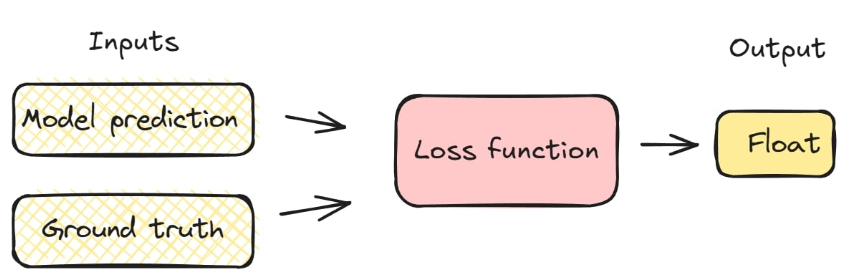

# One Hot Encoding

y = actuals

y^= predicted. specifically, predictions before softmax
if 3-class prediction, y^ = [-5.2, 4.6, 0.8]

One-hot encoding: convert an integer y to a tensor of 0s and 1s

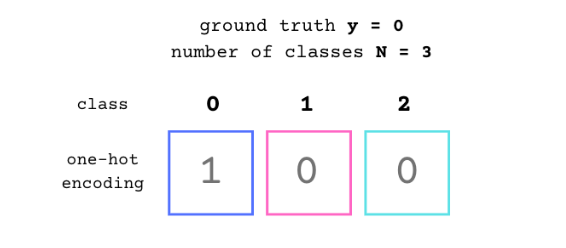


In [47]:
import torch.nn.functional as F

F.one_hot(torch.tensor(0), num_classes=3)
F.one_hot(torch.tensor(1), num_classes=3)
F.one_hot(torch.tensor(2), num_classes=3)
# F.one_hot(torch.tensor(3), num_classes=3) # error


F.one_hot(torch.tensor(2), num_classes=50)

tensor([1, 0, 0])

tensor([0, 1, 0])

tensor([0, 0, 1])

tensor([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0])

##### Cross Entropy Loss
- Most common loss function for binary classification
    - The most frequently used loss function for multiclass classification problems is Cross Entropy Loss.
    - Mean Squared Error (MSE) Loss: Commonly used for regression problems.
    - Binary Cross Entropy Loss: Used for binary classification tasks.
    - Hinge Loss: Often used when training support vector machines (SVMs).
    - Negative Log Likelihood Loss: Common with classification problems in PyTorch.



Cross Entropy Loss — Hand Calculation Example

Problem: 3-class classification

Step 1: Scores (logits from model)
```
scores = [-5.2, 4.6, 0.8]
```

Step 2: Apply Softmax → Convert scores to probabilities
Formula: `softmax_i = exp(score_i) / Σ_j exp(score_j)`

Calculations:
- exp(-5.2) ≈ 0.0055
- exp(4.6) ≈ 99.484
- exp(0.8) ≈ 2.2255
- Denominator = 0.0055 + 99.484 + 2.2255 ≈ 101.715

Probabilities:
```
[0.000054, 0.978, 0.0218]
```

Step 3: Calculate Cross-Entropy Loss from probabilities
Formula: `loss = -log(prob_of_true_class)`

All 3 possible losses (depending on which class is true):

- If true class is Class 0 (one-hot: [1, 0, 0])
  - probability = 0.000054
  - Loss = -log(0.000054) ≈ 9.82

- If true class is Class 1 (one-hot: [0, 1, 0])
  - probability = 0.978
  - Loss = -log(0.978) ≈ 0.022

- If true class is Class 2 (one-hot: [0, 0, 1])
  - probability = 0.0218
  - Loss = -log(0.0218) ≈ 3.83

Note: Since one-hot encoding has only one "1" (the true class), cross-entropy loss produces just one scalar value per sample. Even though we have 3 probabilities, only the probability of the true class (where one-hot is "1") is used in the loss calculation. The other probabilities (where one-hot is "0") don't contribute to the loss.

Summary:
When the predicted probability for the true class is very low, the loss is high. This penalizes the model for making incorrect predictions with high confidence.


- `todo`: hand calculation example for each loss function? 

In [ ]:
# Calculate the loss function for a prediction
from torch.nn import CrossEntropyLoss

one_hot_target = torch.tensor([1, 0, 0]) # same as y  (Actuals, classA, encoded as one-hot label)
scores = torch.tensor([-5.2, 4.6, 0.8])  # same as y^ (Predicted)

In [56]:
criterion = CrossEntropyLoss()
# my_loss = criterion(scores, one_hot_target) # datatype error
my_loss = criterion(scores.double(), one_hot_target.double()) # output float in above screenshot

print("Loss Determined:", my_loss)

Loss Determined: tensor(9.8222, dtype=torch.float64)


## Update Model Parameters

By Minimizing Loss Functions

Backpropogation for training: update weights and biases

